In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import math

Создаём выборку из экспоненциального распределения

In [199]:
rv = sts.expon(0)
sample = rv.rvs(1000)

Рисуем гистограмму по выборке и теоретическую плотность распределения

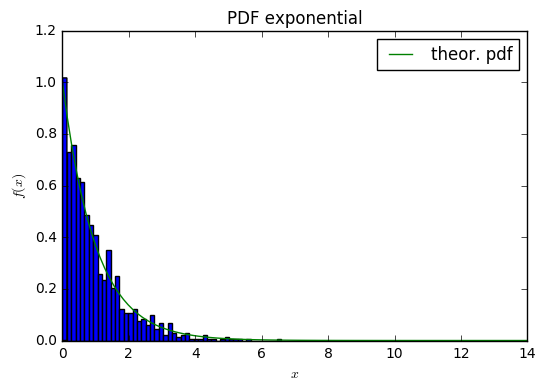

In [247]:
#создадим гистограмму
plt.hist(sample, bins=50, normed=True)
plt.ylabel('number of samples')
plt.xlabel('$x$')

#добавим теоретическую плотность распределения
x = np.linspace(0,14,100)
pdf = rv.pdf(x)
plt.plot(x, pdf, label='theor. pdf')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.title("PDF exponential")

Из распределения берём по 1000 выборок размером 5, 10, 50, 300 наблюдений, считаем для них средние.

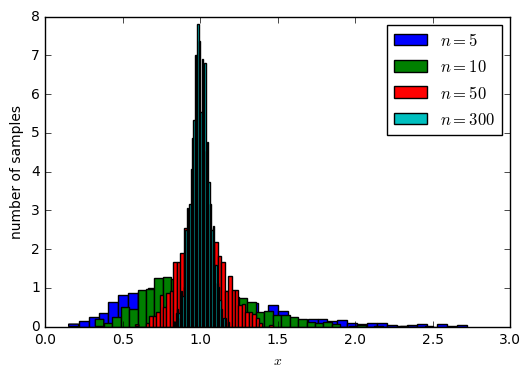

In [217]:
#нормализованные гистограммы выборочных средних, рассчитанные на выборках размера "n" из распределения

Xm = []
#цикл для разного объёма выборок
for n in [5, 10, 50, 300]:
    Xm = []
    #цикл для создания 1000 выборок
    for i in xrange(0,1000):
        #считаем средние и складываем в Xm
        Mean = np.mean(rv.rvs(n))
        Xm.append(Mean)
    #выводим на одну диаграмму внутри цикла по "n", чтобы увидеть разницу распределений
    plt.hist(Xm, bins=40, normed=True, label="$n=%s$" % n)
    plt.ylabel('number of samples')
    plt.xlabel('$x$')
    plt.legend()

Считаем среднее и дисперсию исходного распределения, используем их в дальнейшем в оценке распределения средних

In [200]:
mu, var = rv.stats(moments='mv')
print mu, var

1.0 1.0


Создадим функцию для расчёта распределений средних по 1000 выборкам из n елементов, а также оценки SE и отрисовки теоретического распределения

In [248]:
def samples_clt(n):
    #строим гистограмму по выборке
    Xm = []
    for i in xrange(0,1000):
        Mean = np.mean(rv.rvs(n))
        Xm.append(Mean)
    plt.hist(Xm, bins=100, normed=True, range=[0,3], label="sample n=%s" % n)
    
    #строим теоретическое распределение
    mu, var = rv.stats(moments='mv') #среднее и дисперсия исходного распределения
    sigma = math.sqrt(var) #стандартное отклонение
    se = sigma/math.sqrt(n) #стандартная ошибка
    norm_rv = sts.norm(loc=mu, scale=se) #по найденным параметрам определяем кривую нормального распределения, 
    #апроксимирующую распределение выборочного среднего
    x = np.linspace(0,3,100)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label='theor. distribution')  #строим график плотности вероятности полученного нормального распределения 
    plt.legend()
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    
    Xm = []

Используем полученную функцию, варьируя n и наблюдая за результатами и их различиями

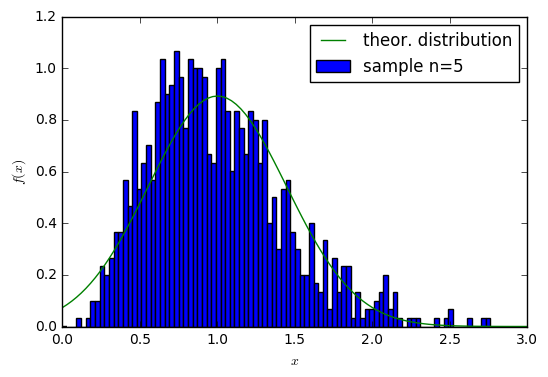

In [249]:
samples_clt(5)

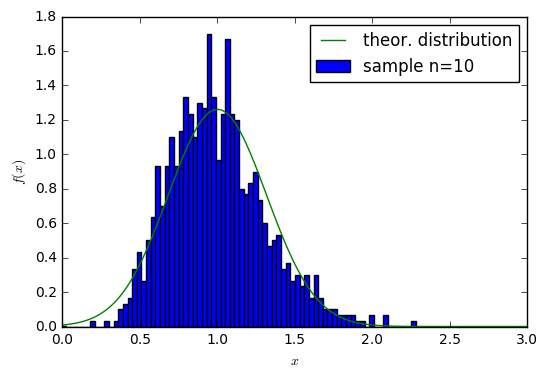

In [238]:
samples_clt(10)

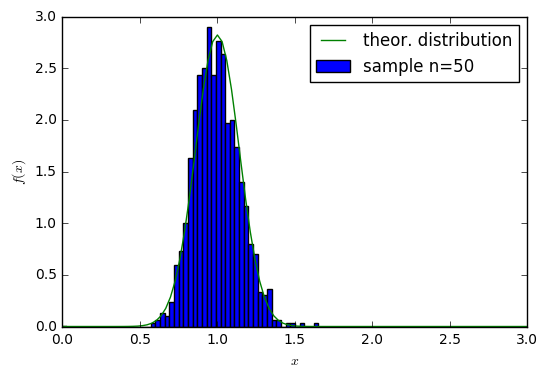

In [244]:
samples_clt(50)

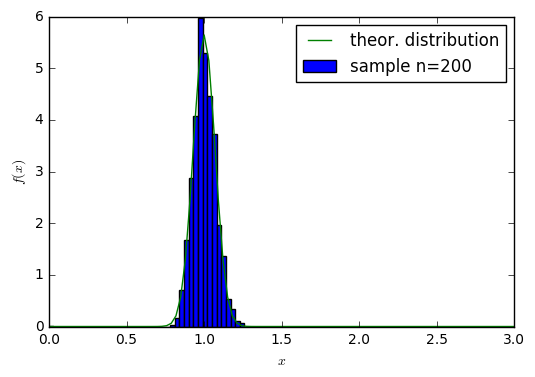

In [232]:
samples_clt(200)

# Выводы
Несмотря на то, что исходное распределение было перекошенным и далёким от нормального (в нашем случае экспоненциальное), видим, как распределение средних из такого распределения при увеличениии выборки приближается к нормальному, т.е. работает ЦПТ, причём уже для малых n (так, на графике n=50 уже очень хорошее приближение).
Также с увеличением выборки оценка среднего становится точнее.